<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of Femicide           2982 non-null   float64
 1   Rate per 100,000 population  2982 non-null   float64
 2   Age (Cleaned)                2982 non-null   int64  
 3   Country Code                 2982 non-null   object 
 4   Country Name                 2982 non-null   object 
 5   Region                       2982 non-null   object 
 6   Subregion                    2982 non-null   object 
 7   Indicator                    2982 non-null   object 
 8   Age                          2982 non-null   object 
 9   Year                         2982 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 233.1+ KB


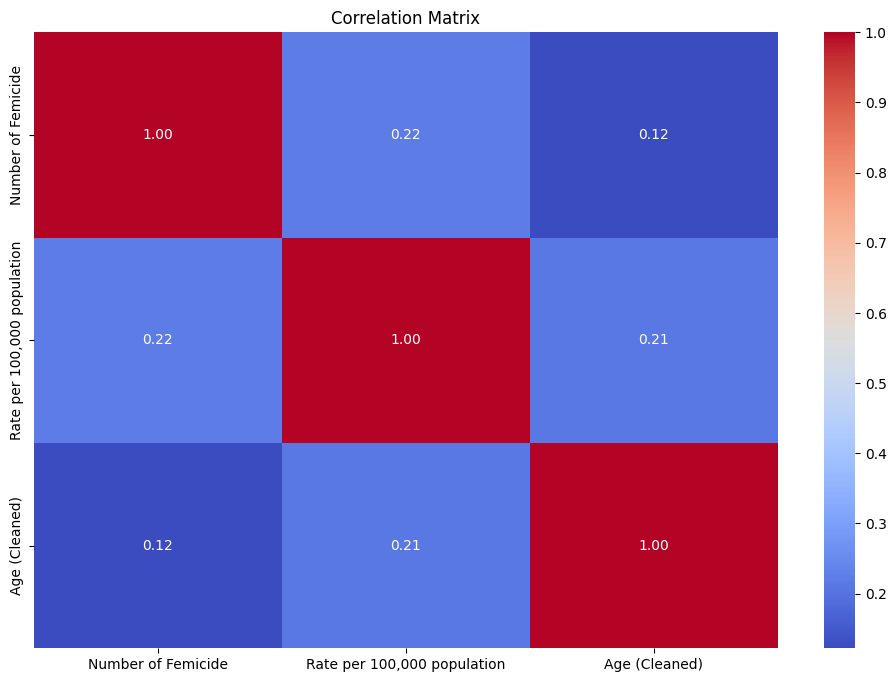

<ipython-input-16-d2176c27e1ca>:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_grouped['Year'] = pd.to_datetime(df_grouped['Year']).dt.year  # extract clean year


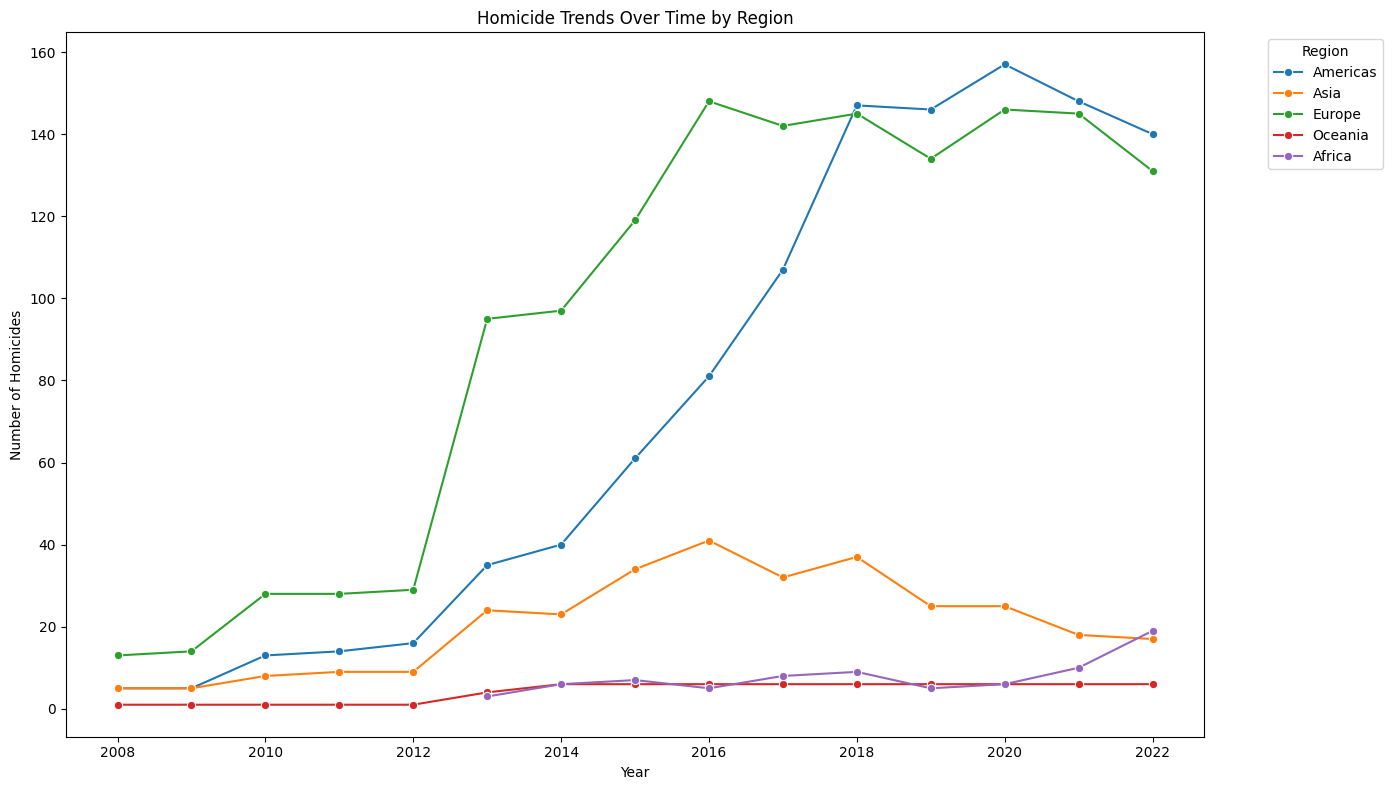

In [ ]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Correlation Analysis

#Load Dataset
df = pd.read_csv('D6 - CleanedHomicideData.csv')

#Inspect Data
df.head()
df.info()
df.describe()
df.isnull().sum()

# Selecting numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

df_grouped = df.groupby(['Year', 'Region']).size().reset_index(name='HomicideCount')
df_grouped['Year'] = pd.to_datetime(df_grouped['Year']).dt.year  # extract clean year

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='Year', y='HomicideCount', hue='Region', marker='o')
plt.title('Homicide Trends Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()







## Milestone 3: Causal Inference & Correlation Analysis

###  Background
This analysis explores the dynamics of **femicide in Canada** using a cleaned homicide dataset (`D6 - CleanedHomicideData.csv`). I examine how regional, temporal, and demographic variables correlate with femicide rates, focusing on the period from **2008 to 2022**.

---

### Visualizations & Findings

#### 1. Correlation Matrix

We explored the strength of relationships between key numerical variables. While the **rate per 100,000 population** had a moderate positive correlation with the **number of femicides** (`r ≈ 0.22`), **age** showed a weaker correlation. These suggest that regional population rates may be a more influential driver than victim age in explaining femicide prevalence.

#### 2. Homicide Trends Over Time by Region

This line plot shows a **steep and consistent rise in homicides** in the **Americas and Europe** between 2012 and 2020, peaking around 2019. Other regions like **Asia, Africa, and Oceania** maintained relatively low and stable trends.

---

### Causal Inference Commentary

While these trends reveal strong correlations, we must be cautious in inferring causality. The rise in femicide in specific regions does not inherently mean that being in those regions causes femicide. **Unobserved variables** such as socio-economic status, institutional trust, access to protection services, or cultural norms may explain much of the variation. Changes in reporting accuracy or policing protocols can also influence these patterns.

Thus, while **correlation supports hypothesis generation**, it does **not confirm causal mechanisms**.
